__Note__: Using code before refactoring to support any shape of state in environment.

In [3]:
ReloadProject('deep_learning')

Path /workspace/external/ added to PYTHON_PATH.
Path /workspace/external/deep_learning added to PYTHON_PATH.


Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


notebook_init.py imported and reloaded
forwarded symbol: A
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: InputLayer
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: T
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: logging
forwarded symbol: logging
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_base
forwarded symbol: q_base
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_impl
forwarded symbol: runner_impl


# WebSite Example
Parameters and model shape are taken from:
https://jaromiru.com/2016/10/03/lets-make-a-dqn-implementation/

## Training

In [52]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
qfunc = qfunc_impl.DQN(
    state_space_dim=env.GetStateSpaceDimension(),
    action_space_size=env.GetActionSpaceSize(),
    hidden_layer_sizes=(64,),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

In [54]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[02:38:46] q_base.py:390 Episode 0/500: total_reward = 9.00, total_steps=8
[02:38:49] q_base.py:392 Episode 100/500: total_reward = 10.00, total_steps=9
[02:38:55] q_base.py:392 Episode 200/500: total_reward = 10.00, total_steps=9
[02:39:01] q_base.py:392 Episode 300/500: total_reward = 19.00, total_steps=18
[02:39:44] q_base.py:392 Episode 400/500: total_reward = 68.00, total_steps=67
CPU times: user 3min 41s, sys: 416 ms, total: 3min 42s
Wall time: 3min 42s


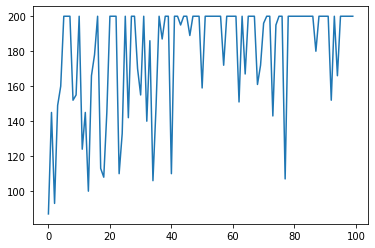

CPU times: user 8min 57s, sys: 1.87 s, total: 8min 59s
Wall time: 9min 1s


In [56]:
%%time
# Train
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

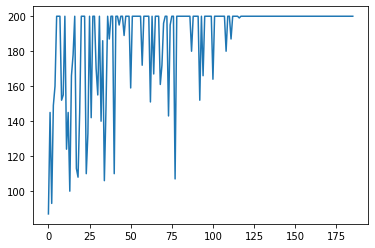

KeyboardInterrupt: 

In [63]:
%%time
# Train
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

In [64]:
qfunc.SaveModel('saved_models/jaromiru_cartpole_v0_07-21.model')

## Demo

In [3]:
demo_env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
demo_env.TurnOnRendering(True)
demo_env.SetGymEnvMaxEpisodeSteps(500)

batch_size = 64  # used in qfunc and runner.
qfunc = qfunc_impl.DQN(
    state_space_dim=demo_env.GetStateSpaceDimension(),
    action_space_size=demo_env.GetActionSpaceSize(),
    hidden_layer_sizes=(64,),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

W0722 04:07:51.797194 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 04:07:52.037831 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 04:07:52.205135 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 04:07:52.299552 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [4]:
qfunc.LoadModel('saved_models/jaromiru_cartpole_v0_07-21.model')

W0722 04:07:59.830176 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0722 04:07:59.831066 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



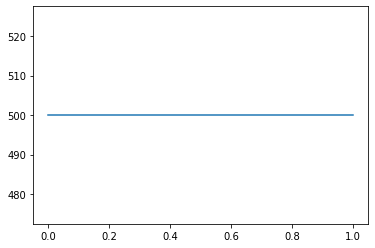

CPU times: user 3.01 s, sys: 477 ms, total: 3.49 s
Wall time: 8.44 s


In [8]:
%%time
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=demo_env, qfunc=qfunc, policy=policy, num_of_episodes=1)

# My models

## 20-20-20
Try the model that has shape (20, 20, 20).

In [4]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
qfunc = qfunc_impl.DQN(
    state_space_dim=env.GetStateSpaceDimension(),
    action_space_size=env.GetActionSpaceSize(),
    hidden_layer_sizes=(20, 20, 20),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

In [5]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[23:44:16] q_base.py:392 Episode 0/500: episode_total_reward = 10.00, episode_steps=9
[23:44:19] q_base.py:394 Episode 100/500: episode_total_reward = 11.00, episode_steps=10
[23:44:24] q_base.py:394 Episode 200/500: episode_total_reward = 11.00, episode_steps=10
[23:44:39] q_base.py:394 Episode 300/500: episode_total_reward = 40.00, episode_steps=39
[23:48:45] q_base.py:394 Episode 400/500: episode_total_reward = 200.00, episode_steps=199
CPU times: user 14min 32s, sys: 8.3 s, total: 14min 40s
Wall time: 15min 19s


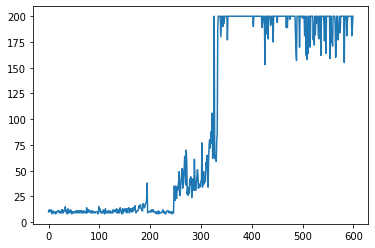

CPU times: user 16min 24s, sys: 9.87 s, total: 16min 34s
Wall time: 16min 42s


In [6]:
%%time
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

__Conclusion__: the (20, 20, 20) model converts much sooner compared to the (64,) model.

## Change parameters
The experience capacity parameter from the post is really large, try to see if reducing it matters much. Also lowering learning rate to 0.9 since 0.99 seems to be really high. Also use a larger epsilon to encourage early exploration.

In [25]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
qfunc = qfunc_impl.DQN(
    state_space_dim=env.GetStateSpaceDimension(),
    action_space_size=env.GetActionSpaceSize(),
    hidden_layer_sizes=(64,),
    training_batch_size=batch_size,
    discount_factor=0.9,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=1000, experience_sample_batch_size=batch_size)

In [26]:
%%time
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.2)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=2000)

[00:23:11] q_base.py:392 Episode 0/2000: episode_total_reward = 12.00, episode_steps=11
[00:23:13] q_base.py:394 Episode 100/2000: episode_total_reward = 11.00, episode_steps=10
[00:23:16] q_base.py:394 Episode 200/2000: episode_total_reward = 12.00, episode_steps=11
[00:23:28] q_base.py:394 Episode 300/2000: episode_total_reward = 66.00, episode_steps=65
[00:23:43] q_base.py:394 Episode 400/2000: episode_total_reward = 64.00, episode_steps=63
[00:24:16] q_base.py:394 Episode 500/2000: episode_total_reward = 141.00, episode_steps=140
[00:25:04] q_base.py:394 Episode 600/2000: episode_total_reward = 110.00, episode_steps=109
[00:25:26] q_base.py:394 Episode 700/2000: episode_total_reward = 112.00, episode_steps=111
[00:26:11] q_base.py:394 Episode 800/2000: episode_total_reward = 200.00, episode_steps=199
[00:26:33] q_base.py:394 Episode 900/2000: episode_total_reward = 17.00, episode_steps=16
[00:27:13] q_base.py:392 Episode 1000/2000: episode_total_reward = 122.00, episode_steps=121
[

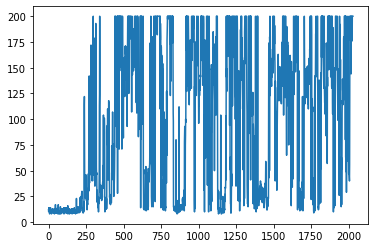

CPU times: user 19.6 s, sys: 388 ms, total: 19.9 s
Wall time: 20.3 s


In [27]:
%%time
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=30)